# **回帰の手法を学ぼう#2**

前章で重回帰で予測モデルを構築した。

しかし、説明変数の各要素のスケールが異なっていることにより目的変数に与える影響度合いを適切に比較できなかった。

・スケールの統一を行い回帰手法の改善を目指す。（標準化を活用した回帰を実践できる）

・重回帰分析で発生しやすい多重共線性という問題の対処方法を学ぶ（多重共線性を対処したうえで、回帰を実施できる）

**前章おさらい**

課題

・カリフォルニアにある住宅に関するデータから、住宅価格を予測したい。

・住宅価格は、主にどの要素から影響を受けているか知りたい。

ゴール

・住宅価格を予測する計算式を決定する。

・住宅に関する各要素が、住宅価格に与える影響度合いについても見解を述べる。

住宅価格を予測する計算式は

住宅価格

≒所得×0.4081　＋　築年数×0.006923　＋　地域人口×0.00001706　＋　緯度×(-0.4041)　＋　経度×(-0.4104)　＋部屋数/人×(-0.2085)　＋　寝室数×1.696 －　34.74

**データの準備**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=4f85d2bdb48393adc9d13dbec0a50e13381e715d163c920073f5a19e457f4eaa
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [5]:
df = pd.read_csv('/california_housing_cleansing .csv')
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [6]:
# 説明変数の定義
X = df.drop(columns=['住宅価格']).to_numpy()
# 目的変数の定義
y = df['住宅価格'].to_numpy()

# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**回帰手法の改善（標準化の活用**

標準化：平均値０，標準偏差１のデータへの変換

標準化変換の流れ

1.StandardScalerクラスのインポート

2.StandardScalerクラスのインスタンス化

3.標準化の変換モデルの生成

4.標準化の変換モデルを利用したスケールの変換

**1.StandardScalerクラスのインポート**

In [7]:
#標準化関連の処理をするためのクラス
#preprocessingモジュールの StandardScalerクラスをインポート
from sklearn.preprocessing import StandardScaler

**2.StandardScalerクラスのインスタンス化**

In [8]:
#インポートしたStandardScalerクラスをインスタンス化してscalerという変数に代入
scaler = StandardScaler()

**3.標準化の変換モデルの生成**

In [9]:
#説明変数の学習データX_trainを用いて、標準化の変換モデルを生成する。
#データセットを因数に指定してfitメソッドを実行すると、指定したデータセットを標準化する変換ロジックがscalerにインプットされる
scaler.fit(X_train)

StandardScaler()

これでX_trainを標準化する変換モデルが生成されたらしい……

**4.標準化の変換モデルを利用したスケールの変換**

In [10]:
#X_trainのスケール変換
X_train_scaled = scaler.transform(X_train)

In [11]:
#X_trainとX_train_scaledをDateFrame形式で表示させて、変換前後の状態を比較する
df_X_train = pd.DataFrame(X_train, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_train.head()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,3.7500,29.0,1390.0,34.04,-117.98,1.056115,0.223022
1,3.1187,25.0,588.0,33.01,-117.07,3.605442,0.647959
2,4.6406,45.0,1180.0,33.90,-118.07,1.505085,0.299153
3,5.9010,18.0,2882.0,34.33,-118.43,2.044067,0.319223
4,2.6167,42.0,1271.0,37.99,-122.34,1.204563,0.256491


In [12]:
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_train_scaled.head()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,0.034653,0.178247,-0.075532,-0.723337,0.760166,-0.837592,-0.809192
1,-0.368102,-0.170455,-0.767887,-1.203976,1.220266,1.614325,1.182965
2,0.602835,1.573057,-0.256822,-0.788667,0.714662,-0.405778,-0.452281
3,1.406941,-0.780684,1.212489,-0.588012,0.532645,0.112610,-0.358190
4,-0.688367,1.311530,-0.178263,1.119887,-1.444266,-0.694816,-0.652284


スケールが小さくなっている。

In [13]:
#df_X_train_scaledの各要素の平均値と標準偏差を確認し、標準化されているかチェック
df_X_train_scaled.describe()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
count,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04
mean,4.533263e-15,7.651999e-17,8.280556e-17,-3.489093e-14,-8.354643e-14,1.134163e-14,-1.848504e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.038837e+00,-2.262670e+00,-1.268592e+00,-1.418630e+00,-2.420081e+00,-1.850904e+00,-1.851601e+00
25%,-7.374752e-01,-8.678601e-01,-5.701945e-01,-7.793341e-01,-1.034727e+00,-4.232155e-01,-3.998158e-01
50%,-1.394514e-01,3.896079e-03,-2.291970e-01,-6.300096e-01,5.225325e-01,-2.454245e-02,-1.384252e-01
75%,5.805695e-01,7.884766e-01,2.622279e-01,9.752284e-01,7.652223e-01,2.989548e-01,1.855580e-01
max,7.211958e+00,2.096111e+00,2.952823e+01,2.935112e+00,2.615732e+00,3.790064e+01,3.916628e+01


平均値が限りなく０に近づき、標準偏差も限りなく１に近い値となった

In [14]:
#X_testのスケール変換
X_test_scaled  = scaler.transform(X_test)

In [15]:
df_X_test = pd.DataFrame(X_test, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_test.head()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,2.9628,36.0,2388.0,34.13,-117.27,1.397404,0.287688
1,2.2279,37.0,72.0,37.65,-120.95,1.888889,0.277778
2,4.5781,9.0,2235.0,33.18,-117.26,2.031320,0.354810
3,5.5209,35.0,1052.0,34.22,-118.52,1.539924,0.258555
4,2.2361,46.0,101.0,38.02,-121.82,1.742574,0.425743


In [16]:
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_test_scaled.head()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,-0.467563,0.788477,0.786026,-0.681340,1.119145,-0.509344,-0.506026
1,-0.936412,0.875652,-1.213342,0.961229,-0.741477,-0.036639,-0.552489
2,0.562961,-1.565265,0.653943,-1.124647,1.124201,0.100350,-0.191353
3,1.164446,0.701301,-0.367323,-0.639342,0.487140,-0.372270,-0.642607
4,-0.931181,1.660233,-1.188306,1.133886,-1.181352,-0.177363,0.141187


In [17]:
df_X_test_scaled.describe()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,-0.005149,0.008292,-0.020433,0.004869,-0.002439,0.030341,0.037607
std,1.005489,0.988514,1.012970,1.007327,1.005098,1.245476,1.404714
min,-2.038837,-2.175494,-1.272908,-1.423296,-2.435249,-1.752933,-1.772656
25%,-0.748863,-0.780684,-0.583144,-0.784000,-1.065063,-0.407443,-0.380380
50%,-0.154763,0.003896,-0.253369,-0.630010,0.517476,-0.011944,-0.123381
75%,0.592882,0.788477,0.258559,0.965896,0.765222,0.303824,0.197324
max,7.211958,2.096111,23.385096,2.967777,2.534835,51.258832,64.690468


スケールは小さくなったが、平均値0,標準偏差１からは乖離している。

何故ってX_trainを標準化する変換モデルによってスケール変換されたから。



---

# **＝＝＝＝＝＝＝＝＝＝＝このままでいいの？**

・標準化の変換モデルの生成に説明変数のテストデータを利用しない理由

**・X_test_scaledが標準化されていなくても問題とならない理由**

本章に置いて、X_test_scaledは予測モデルの評価に利用されるデータだから。

テストデータによる予測モデルの評価は道のデータに対する予測をするときと同条件で実施することが求められる。

重要ポイントは、**未知のデータに対する予測と同じ変換モデルによってテストデータがスケール変換されるべき**ということ。

・目的変数をスケール変換しない理由

目的変数のスケールをそろえることにメリットがない。

スケール変換の目的は、説明変数の重要度の比較であるためである。

**スケール変換後の回帰の流れ**

スケール返還後のプロセス(通常の回帰とほぼ同様)

1.予測モデルの学習

2.予測モデルの評価

3.予測

4.設定したゴールに対する考察

**1.予測モデルの学習**

In [19]:
#LinearRegressionクラスをインスタンス化してmodelという変数に代入
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
#説明変数のスケール変換済み学習データ(X_train_scaled)と目的変数の学習データ(y_train)を利用して学習させる。
model.fit(X_train_scaled, y_train)

LinearRegression()

**2.学習モデルの評価**

パターン１.学習データで決定係数をチェックパターン

In [21]:
model.score(X_train_scaled, y_train)

0.5967954005117011

パターン２.テストデータで決定係数をチェック

In [22]:
model.score(X_test_scaled, y_test)

0.5752388860477975

学習データとテストデータ双方から出力された決定係数に大きな乖離は見られないから、過学習も発生していないらしい。

**3.予測**

In [23]:
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])

In [24]:
X_new_scaled = scaler.transform(X_new)
X_new_scaled

array([[ 2.74605512,  1.22435471, -0.84385579,  0.65791393, -0.26115327,
        -0.8915631 , -0.91712007],
       [-1.08180733, -1.4780894 ,  0.45107143,  1.1245529 , -1.27236074,
        -0.41066806,  0.48931492],
       [-1.71978441, -0.17045515, -0.41221338,  1.1245529 , -0.76675701,
         0.07022698,  2.83337325]])

X_new_scaledのスケールが小さくなっていることを確認できた。このX_new_scaledから住宅価格を予測する。

In [25]:
model.predict(X_new_scaled)

array([3.2387497 , 1.42228534, 1.43428255])

**4.設定したゴールに対する考察**

住宅価格を予測する計算式を決定する。

住宅に関する各要素が、住宅価格に与える影響度合いについても見解を述べる。

In [26]:
#学習済み予測モデルをもとに、住宅価格を予測する計算式を作成する。
print(model.coef_)
print(model.intercept_)

[ 0.63969525  0.07941585  0.01976508 -0.86589837 -0.81166365 -0.21676945
  0.36174341]
1.8977734592306714


住宅価格を予測する計算式は

住宅価格

≒所得×0.6397　＋　築年数×0.07942　＋　地域人口×0.01977　＋　緯度×(-0.8659)　＋　経度×(-0.8117)　＋部屋数/人×(-0.2168)　＋　寝室数×0.3617 －　1.898

<Axes: >

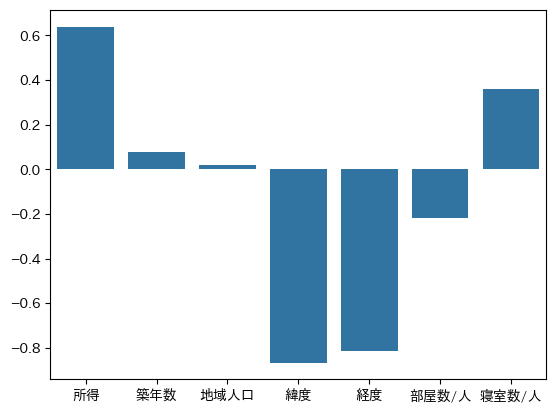

In [27]:
#各要素の重みをseabornのbarplot関数で可視化
aisns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'], y=model.coef_)

# **回帰手法の改善（多重共線性の対処)**

**多重共線性**：重回帰における説明変数の中に、相関関係が高い要素が共存している状態のこと。

多重共線性は、重回帰の計算式の重みに悪影響を与える。

**多重共線性の主な対処方法**

１．相関関係の高い要素群の中で、１要素だけを分析に利用する

　※デメリット：収集したデータを活用しきれない

２．相関関係の高い要素群をもとに、新たな要素を作成する。

　※デメリット：新要素が何を意味するか説明が難しいケースがあるため、ゴールに応じて分析者本人が対処方法を適切に選択しなければいけない。



In [28]:
#多重共線性への対処

#説明変数同士の相関関係を確認する。
#相関係数はDateFrameのcorrメソッドで算出可能。
df.drop(columns=['住宅価格']).corr()

,所得,築年数,地域人口,緯度,経度,部屋数/人,寝室数/人
所得,1.000000,-0.202770,0.040534,-0.075305,-0.016145,0.210331,-0.060904
築年数,-0.202770,1.000000,-0.280775,-0.051961,-0.033877,-0.157083,-0.097772
地域人口,0.040534,-0.280775,1.000000,-0.106927,0.090809,-0.136746,-0.132073
緯度,-0.075305,-0.051961,-0.106927,1.000000,-0.922726,0.156807,0.111326
経度,-0.016145,-0.033877,0.090809,-0.922726,1.000000,-0.077510,-0.041287
部屋数/人,0.210331,-0.157083,-0.136746,0.156807,-0.077510,1.000000,0.913547
寝室数/人,-0.060904,-0.097772,-0.132073,0.111326,-0.041287,0.913547,1.000000


経度と緯度の相関係数、部屋数/人と寝室数/人の相関係数が比較的高いことが確認できた。

<Axes: xlabel='経度', ylabel='緯度'>

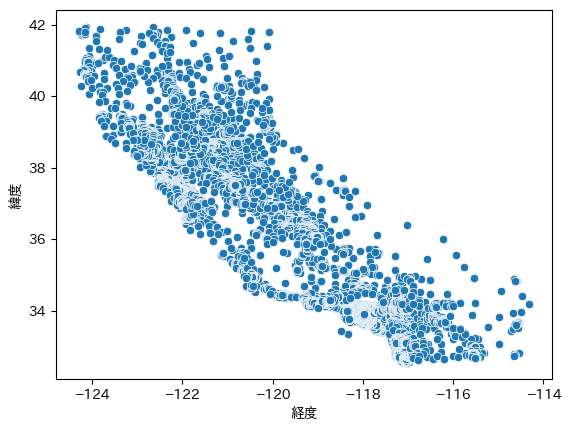

In [30]:
#緯度と経度のペアから対処方法を検討する。
#相関の状態を確認するためにseabornのscatterplot関数で散布図を作成する。
sns.scatterplot(x='経度',y='緯度', data=df)

カリフォルニアは、以下のように北西から南東方向への長細い地形のため、緯度と経度の相関が高くなっている。
度と経度のどちらか一方の情報があれば、立地エリアをおおむね表現できであるため、今回は緯度のデータを利用して、経度のデータは利用しないことにする。

**相関関係の高い要素群の中で、１要素だけを分析に利用している例か**

<Axes: xlabel='部屋数/人', ylabel='寝室数/人'>

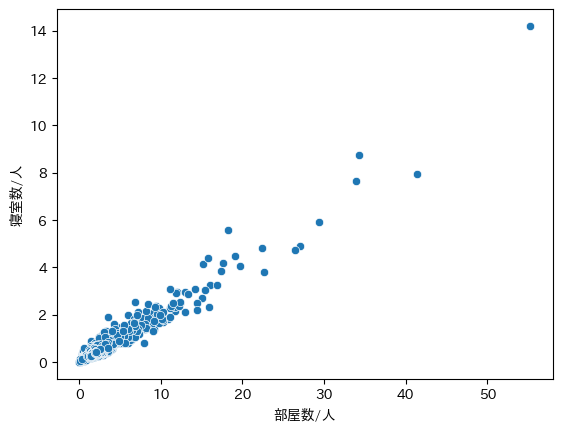

In [31]:
#部屋数/人と寝室数/人のペアの対処方法を検討する。
sns.scatterplot(x='部屋数/人', y='寝室数/人', data=df)

屋数が多いと寝室数も多いという、理解しやすい相関
どちらも住宅の規模の大きさを示す指標であるため、今回は部屋数/人を利用して、寝室数/人のデータは利用しないことにする。

**捨てれるところは捨てる方針…？**

上の多重共線性への対処方針から、説明変数は所得・築年数・地域人口・緯度・部屋数/人のみとする。

目的変数は従来どおり、住宅価格

説明変数Xと目的変数yを再定義していく。

In [32]:
X = df[['所得', '築年数', '地域人口', '緯度', '部屋数/人']].to_numpy()
y = df['住宅価格'].to_numpy()


# **多重共線性の対処後の流れ**

1.説明変数のスケール変換

2.予測モデルの学習

3.予測モデルの評価

4.予測

5.設定したゴールに対する考察

**1.説明変数のスケール変換**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
#StandardScalerクラスをインスタンス化
scaler = StandardScaler()

In [35]:
#X_trainを利用して標準化の変換ロジックをインプットさせる。
scaler.fit(X_train)

StandardScaler()

In [36]:
#この変換モデルを利用して、X_trainとX_testをスケール変換
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

**2.予測モデルの学習**

In [37]:
#LinearRegressionクラスを新たにインスタンス化
model = LinearRegression()

In [38]:
#説明変数のスケール変換済み学習データ（X_train_scaled）と、目的変数の学習データ（y_train）で学習
model.fit(X_train_scaled, y_train)

LinearRegression()

**3.予測モデルの評価**

In [40]:
#scoreメソッドを利用して、決定係数を出力

#学習データを用いた決定係数
print(model.score(X_train_scaled, y_train))
#テストデータを用いた決定係数
print(model.score(X_test_scaled, y_test))

0.4740232339239423
0.4835885444947774


学習データでの決定係数とテストデータでの決定係数にかい離は見られず、過学習は発生していないと判断できるらしい。

予測に対するテストデータは、決定係数0.48程度当てはまっていることが確認された。

**4.予測**

In [41]:
#ndarray形式でX_newという変数に保持させる
X_new = np.array([[8, 41, 500, 38, 2],
                  [10, 10, 1000, 40, 1],
                  [7.5, 25, 3500, 39, 3]])

In [42]:
#X_nweをスケール変換
X_new_scaled = scaler.transform(X_new)

In [43]:
#X_new_scaledから住宅価格を予測
model.predict(X_new_scaled)

array([3.68520926, 3.9076587 , 3.36531902])

**5.設定したゴールに対する考察**

住宅価格を予測する計算式を決定する

住宅に関する各要素が、住宅価格に与える影響度合いについても見解を述べる

In [44]:
#学習済み予測モデルをもとに、住宅価格を予測する計算式を作成
print(model.coef_)
print(model.intercept_)

[ 0.63613076  0.15847579  0.03447017 -0.11502971  0.07119682]
1.8977734592307616


住宅価格を予測する計算式は

住宅価格

≒所得×0.6361　＋　築年数×0.1585　＋　地域人口×0.03447　＋　緯度×(-0.1150)　＋　＋部屋数/人×0.07120　＋　1.898

<Axes: >

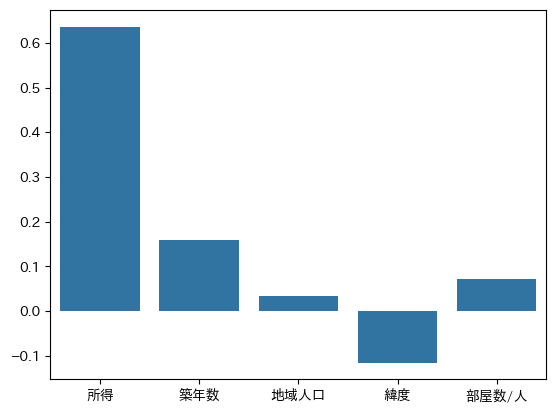

In [46]:
#各要素の重みをseabornのbarplot関数で可視化
sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '部屋数/人'], y=model.coef_)